In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import scikitplot as skplt
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus 
import matplotlib.pyplot as plt
# Mostrar todas as colunas dos dataframes
pd.set_option('display.max_columns', None)

In [2]:
# IMPORTAÇÃO DA BASE DE EMPRESAS - Estamos informando os tipos já identificados nas etapas anteriores.
colstype = {'opc_mei': np.uint8, 'inexistente': np.uint8, 'anos_de_atividade_empresa': np.uint8, 
'telefone_provavelmente_invalido': np.uint8, 'Atendimentos_Procon': np.uint32, 'empresa_devedora_uniao': np.uint8,
'empresa_venceu_licitacao': np.uint8, 'empresa_participou_licitacao': np.uint8, 'empresa_recurso_recebido_governo_federal': float,
'empresa_sancionada': np.uint8, 'qte_socios': np.uint32, 'tempo_de_sociedade': np.int32, 'auxilio_emergencial_bloqueado': np.int8, 
'socio_solicitou_auxilio_emergencial': np.int8, 'socio_solicitou_bolsa_familia': np.int8, 'socio_candidato': np.int8, 
'socio_devedor_uniao': np.int8, 'empresas_inexistentes_socio_participa': np.int32, 'qte_cnpj_socio_participa': np.int32,
'socio_pessoa_politicamente_exposta': np.int8, 'socio_recurso_recebido_governo_federal': float, 
'socio_solicitou_seguro_defeso': np.int8, 'socio_sancionado': np.int8, 'qte_empresas_com_mesmo_telefone': np.int32,
'telefone_preenchido': np.int8, 'qte_empresas_com_mesmo_endereco': np.int32, 'filial_2': np.uint8, 
'cod_nat_juridica_enc': np.int32, 'cnae_fiscal_enc': np.int32, 'uf_enc': np.int32,  
'municipio_enc': np.int32, 'qualif_resp_enc': np.int32, 'porte_01': np.uint8, 'porte_03': np.uint8,
'porte_05': np.uint8, 'porte_00': np.uint8, 'opc_simples_0': np.uint8, 'opc_simples_5': np.uint8, 'opc_simples_6': np.uint8,
'email_enc': np.int32}
empresas_df = pd.read_csv(r'C:\DATASETS\Empresas Rotuladas\empresas_rotuladas-analise.csv', dtype=colstype)

In [3]:
# Estatísticas da base:
empresas_df.describe()

opc_mei   inexistente  anos_de_atividade_empresa  \
count  1.559943e+06  1.559943e+06               1.559943e+06   
mean   1.724358e-02  8.820047e-01               6.973359e+00   
std    1.301778e-01  3.226027e-01               5.267015e+00   
min    0.000000e+00  0.000000e+00               0.000000e+00   
25%    0.000000e+00  1.000000e+00               5.000000e+00   
50%    0.000000e+00  1.000000e+00               6.000000e+00   
75%    0.000000e+00  1.000000e+00               7.000000e+00   
max    1.000000e+00  1.000000e+00               1.300000e+02   

       telefone_provavelmente_invalido  Atendimentos_Procon  \
count                     1.559943e+06         1.559943e+06   
mean                      5.415582e-03         7.246521e-01   
std                       7.339113e-02         1.270590e+02   
min                       0.000000e+00         0.000000e+00   
25%                       0.000000e+00         0.000000e+00   
50%                       0.000000e+00         0.000000e+00   
75%                       0.000000e+00         0.000000e+00   
max                       1.000000e+00         7.802300e+04   

       empresa_devedora_uniao  empresa_venceu_licitacao  \
count            1.559943e+06              1.559943e+06   
mean             2.470988e-02              5.914960e-03   
std              1.552395e-01              7.668101e-02   
min              0.000000e+00              0.000000e+00   
25%              0.000000e+00              0.000000e+00   
50%              0.000000e+00              0.000000e+00   
75%              0.000000e+00              0.000000e+00   
max              1.000000e+00              1.000000e+00   

       empresa_participou_licitacao  empresa_recurso_recebido_governo_federal  \
count                  1.559943e+06                              1.559943e+06   
mean                   7.220777e-03                              1.136474e+06   
std                    8.466783e-02                              7.016795e+08   
min                    0.000000e+00                             -3.876930e+07   
25%                    0.000000e+00                              0.000000e+00   
50%                    0.000000e+00                              0.000000e+00   
75%                    0.000000e+00                              0.000000e+00   
max                    1.000000e+00                              6.897773e+11   

       empresa_sancionada    qte_socios  tempo_de_sociedade  \
count        1.559943e+06  1.559943e+06        1.559943e+06   
mean         1.833400e-04  1.113958e+00        6.203179e+00   
std          1.353907e-02  8.809046e-01        3.263609e+00   
min          0.000000e+00  1.000000e+00        0.000000e+00   
25%          0.000000e+00  1.000000e+00        5.000000e+00   
50%          0.000000e+00  1.000000e+00        6.000000e+00   
75%          0.000000e+00  1.000000e+00        7.000000e+00   
max          1.000000e+00  3.570000e+02        8.600000e+01   

       auxilio_emergencial_bloqueado  socio_solicitou_auxilio_emergencial  \
count                   1.559943e+06                         1.559943e+06   
mean                    2.519066e-02                         5.454725e-01   
std                     1.567039e-01                         4.979281e-01   
min                     0.000000e+00                         0.000000e+00   
25%                     0.000000e+00                         0.000000e+00   
50%                     0.000000e+00                         1.000000e+00   
75%                     0.000000e+00                         1.000000e+00   
max                     1.000000e+00                         1.000000e+00   

       socio_solicitou_bolsa_familia  socio_candidato  socio_devedor_uniao  \
count                   1.559943e+06     1.559943e+06         1.559943e+06   
mean                    5.951051e-02     7.529121e-03         2.747088e-02   
std                     2.365778e-01     8.644327e-02         1.634510e-01   
min                     0.00000

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNu

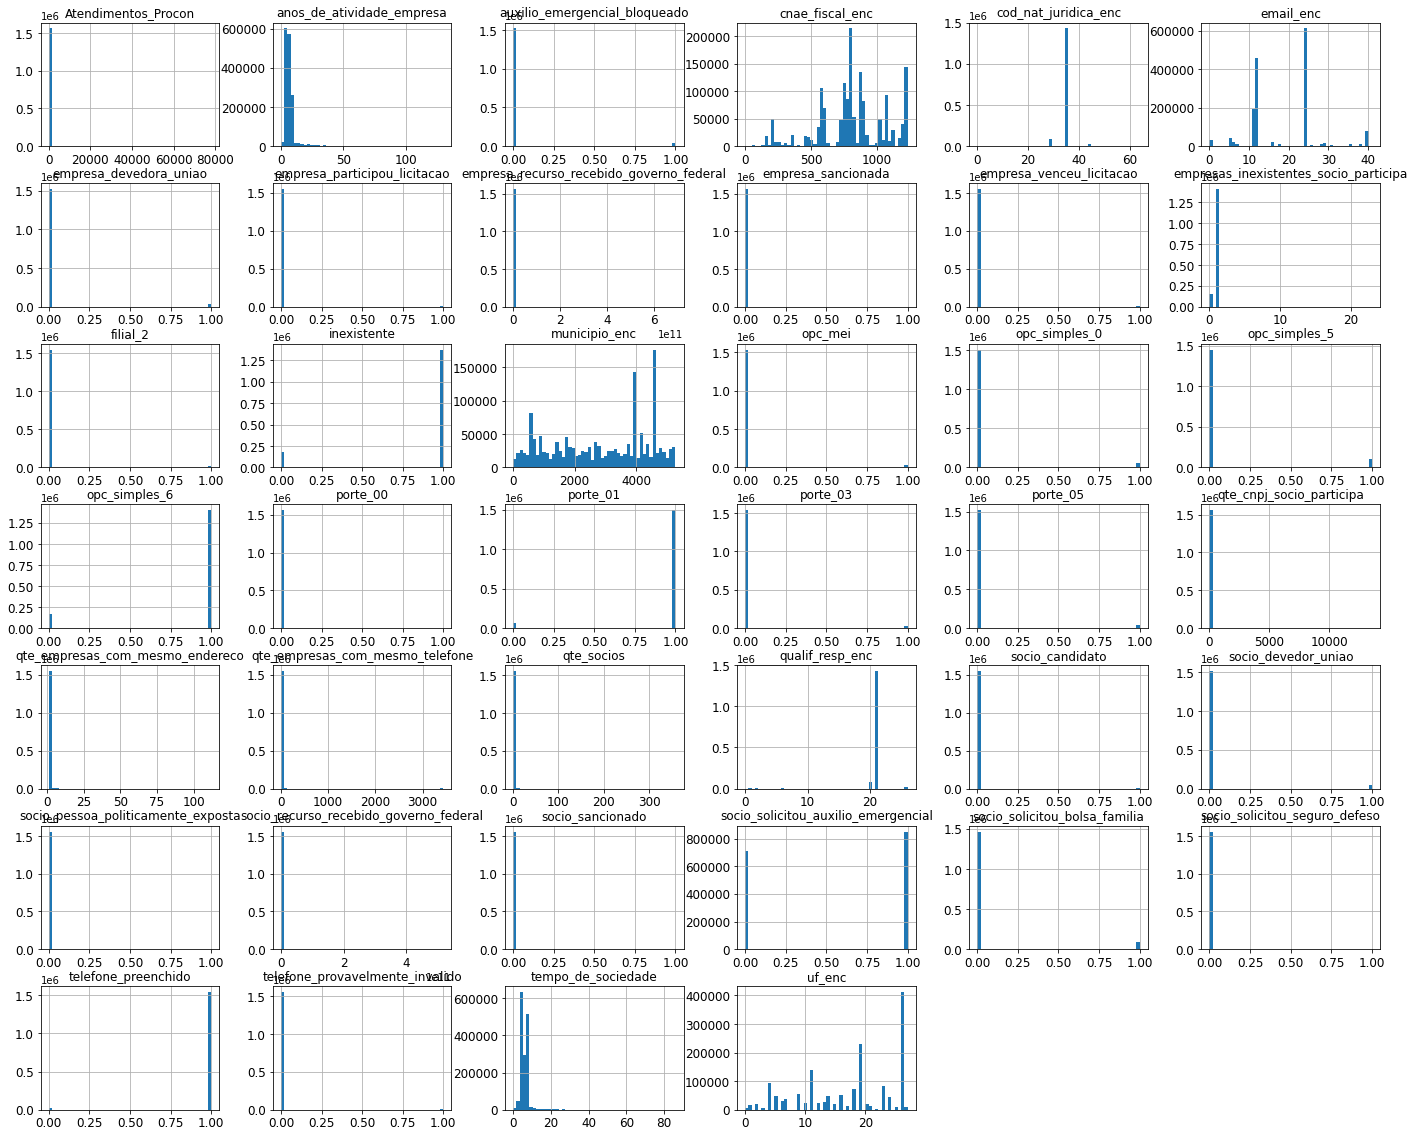

In [4]:
# Vamos visualizar distribuição das variáveis:
fig, ax = plt.subplots(1, 1, figsize=(24, 20))
empresas_df.hist(ax=ax, bins=50, xlabelsize=12, ylabelsize=12);

Foram escolhidos dois modelos a testar:<br>
* Regressão Linear, modelo popular para classificação;
* Árvore de Decisão.

## Regressão Linear

In [5]:
# Separação das variáveis entre X e y
X = empresas_df.drop('inexistente', axis=1)
y = empresas_df['inexistente']

Separação estratificada, mantém a proporção da variável alvo nos dois subconjuntos de dados:

In [7]:
# Dividindo o dataset entre treino e teste
# Parâmetros:
# - train:25%, test:75% - If train_size is also None, it will be set to 0.25.
# - shuffle:True para embaralhar os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

### Padronizando os dados:

<i>Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.<br>In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.</i>

In [8]:
# Padronizando a base de treino:

scaled_features = X_train.copy()

# Colunas a padronizar (apenas colunas numéricas):
col_names = ['anos_de_atividade_empresa', 'Atendimentos_Procon', 
'empresa_recurso_recebido_governo_federal', 'tempo_de_sociedade',
'empresas_inexistentes_socio_participa', 'qte_cnpj_socio_participa', 
'socio_recurso_recebido_governo_federal', 'qte_empresas_com_mesmo_telefone',
'qte_socios', 'qte_empresas_com_mesmo_endereco']

# Padronização da base:
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_names] = features
X_train = scaled_features

In [9]:
# Padronizando a base de teste:

scaled_features = X_test.copy()

# Padronização da base:
features = scaled_features[col_names]
features = scaler.transform(features.values)

scaled_features[col_names] = features
X_test = scaled_features

### Execução do modelo:

In [10]:
# Instanciar e treinar um modelo de Regressão Logística
model = LogisticRegression(solver='lbfgs', max_iter=20000)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=20000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Obs: foi usado solver=lbfgs para suprimir warning do LogisticRegression. Após utilizar esse solver, o modelo não convergiu. Foram tentados outros valores para max_iter (1000, 2000, etc), convergiu com 20000.

In [11]:
# Realizar as previsões em cima dos dados de teste
y_pred = model.predict(X_test)

Relatório de classificação:
               precision    recall  f1-score   support

           0     0.9893    0.9771    0.9832     46017
           1     0.9969    0.9986    0.9978    343969

    accuracy                         0.9961    389986
   macro avg     0.9931    0.9879    0.9905    389986
weighted avg     0.9960    0.9961    0.9960    389986

Acurácia: 0.9961

AUC: 0.9879



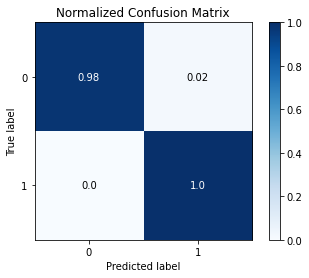

In [12]:
# Plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# Mostrar relatório de classificação
print("Relatório de classificação:\n", 
      classification_report(y_test, y_pred, digits=4))

# Mostrar acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# Mostrar a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

## Reexecução do mesmo modelo, mas sem as variáveis que possam gerar algum grau de enviesamento:

Na etapa de análise e exploração dos dados, vimos que as variáveis a seguir apresentaram forte correlação com a variável target 'inexistente', e poderiam gerar algum tipo de enviesamento do modelo:<br>
* opc_simples_6: 0.905242
* empresas_inexistentes_socio_participa: 0.803156
* porte_01: 0.561087
* opc_simples_5: -0.744156
<br><br>
Além delas, também havia a cod_nat_juridica_enc, que poderia gerar algum grau de enviesamento do modelo.<br>
Vamos removê-las do dataset e reexecutar o modelo:

In [13]:
# Separação das variáveis entre X e y, removendo as seguintes colunas:
colunas_remover = ['opc_simples_6', 'empresas_inexistentes_socio_participa',
                   'porte_01', 'opc_simples_5', 'cod_nat_juridica_enc']
X = empresas_df.drop(columns=colunas_remover).drop('inexistente', axis=1)
y = empresas_df['inexistente']

In [14]:
# Dividindo o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

#### Padronizando colunas:

In [15]:
# Padronizando a base de treino:

scaled_features = X_train.copy()

# Colunas a padronizar (apenas colunas numéricas):
col_names = ['anos_de_atividade_empresa', 'Atendimentos_Procon',
'empresa_recurso_recebido_governo_federal', 'tempo_de_sociedade',
'qte_cnpj_socio_participa', 'socio_recurso_recebido_governo_federal',
'qte_empresas_com_mesmo_telefone', 'qte_socios',
'qte_empresas_com_mesmo_endereco']

# Padronização da base:
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_names] = features
X_train = scaled_features

In [16]:
# Padronizando a base de teste:

scaled_features = X_test.copy()

# Padronização da base:
features = scaled_features[col_names]
features = scaler.transform(features.values)

scaled_features[col_names] = features
X_test = scaled_features

#### Executando o modelo:

In [17]:
# Instanciar e treinar um modelo de Regressão Logística
model = LogisticRegression(solver='lbfgs', max_iter=20000)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=20000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
# Realizar as previsões em cima dos dados de teste
y_pred = model.predict(X_test)

Relatório de classificação:
               precision    recall  f1-score   support

           0     0.9652    0.8359    0.8959     46017
           1     0.9784    0.9960    0.9871    343969

    accuracy                         0.9771    389986
   macro avg     0.9718    0.9160    0.9415    389986
weighted avg     0.9769    0.9771    0.9764    389986

Acurácia: 0.9771

AUC: 0.9160



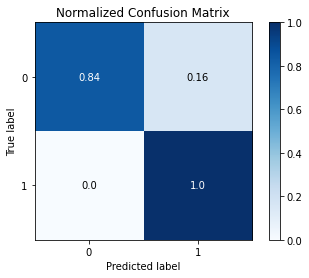

In [19]:
# Plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# Mostrar relatório de classificação
print("Relatório de classificação:\n", classification_report(y_test, y_pred, digits=4))

# Mostrar acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# Mostrar a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

Observamos um impacto maior nas previsões da classe 'inexistente=0' (minoritária). Vamos fazer novos ajustes:

### Nova reexecução do modelo, sem as variáveis que possam gerar algum grau de enviesamento, e agora com alguns ajustes adicionais:

Vamos continuar sem as variáveis: 
* opc_simples_6                               
* empresas_inexistentes_socio_participa       
* porte_01                                    
* opc_simples_5
* cod_nat_juridica_enc

In [20]:
# Separação das variáveis entre X e y
colunas_remover = ['opc_simples_6', 'empresas_inexistentes_socio_participa', 'porte_01', 'opc_simples_5', 'cod_nat_juridica_enc']
X = empresas_df.drop(columns=colunas_remover).drop('inexistente', axis=1)
y = empresas_df['inexistente']

In [21]:
# Dividindo o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

#### Vamos padronizar novamente os dados:

In [22]:
# Padronizando a base de treino:

scaled_features = X_train.copy()

# Colunas a padronizar (apenas colunas numéricas):
col_names = ['anos_de_atividade_empresa', 'Atendimentos_Procon', 'empresa_recurso_recebido_governo_federal', 
'tempo_de_sociedade', 'qte_cnpj_socio_participa', 'socio_recurso_recebido_governo_federal',
'qte_empresas_com_mesmo_telefone', 'qte_socios', 'qte_empresas_com_mesmo_endereco']

# Padronização da base:
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_names] = features
X_train = scaled_features

In [23]:
# Padronizando a base de teste:

scaled_features = X_test.copy()

# Padronização da base:
features = scaled_features[col_names]
features = scaler.transform(features.values)

scaled_features[col_names] = features
X_test = scaled_features

#### Mas dessa vez, vamos balancear os dados:

1    138049
0    138049
dtype: int64


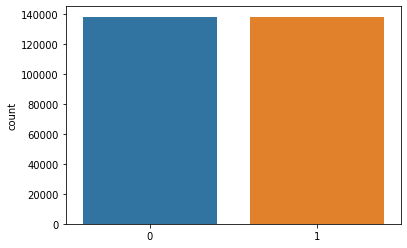

In [24]:
# Balanceamento dos dados:

# Técnica de under-sampling
rus = RandomUnderSampler()
X_train, y_train = rus.fit_sample(X_train, y_train)
 
# Visualizar o balanceamento das classes
print(pd.Series(y_train).value_counts())
 
# Plotar a nova distribuição de classes
sns.countplot(y_train);

#### Reexecutando o modelo:

In [25]:
# Instanciar e treinar um modelo de Regressão Logística
model = LogisticRegression(solver='lbfgs', max_iter=20000)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=20000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
# Realizar as previsões em cima dos dados de teste
y_pred = model.predict(X_test)

Relatório de classificação:
               precision    recall  f1-score   support

           0     0.9367    0.9027    0.9194     46017
           1     0.9870    0.9918    0.9894    343969

    accuracy                         0.9813    389986
   macro avg     0.9619    0.9473    0.9544    389986
weighted avg     0.9811    0.9813    0.9812    389986

Acurácia: 0.9813

AUC: 0.9473



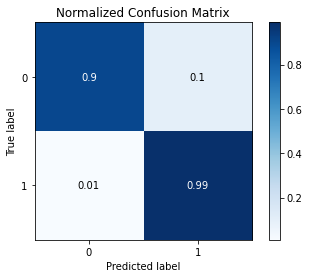

In [27]:
# Plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# Mostrar relatório de classificação
print("Relatório de classificação:\n", classification_report(y_test, y_pred, digits=4))

# Mostrar acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# Mostrar a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

Conclusão: as variáveis removidas tinham relevância no modelo, gerando uma perda de performance após remoção. Mas foi possível minimizar um pouco essa perda simplesmente fazendo o balanceamento do dataset.<br>Vamos ver a seguir se conseguimos melhorar mais ainda o resultado se utilizarmos outro modelo de machine learning.

## Árvore de decisão:

Obs:<br>
* scikit-learn implementation does not support categorical variables for now. 
* Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

Vamos continuar removendo as seguintes variáveis (mesmo cenário da última execução do modelo anterior):
* opc_simples_6                               
* empresas_inexistentes_socio_participa       
* porte_01                                    
* opc_simples_5
* cod_nat_juridica_enc

In [28]:
# Separação das variáveis entre X e y, removendo 
colunas_remover = ['opc_simples_6', 'empresas_inexistentes_socio_participa',
                   'porte_01', 'opc_simples_5', 'cod_nat_juridica_enc']
X = empresas_df.drop(columns=colunas_remover).drop('inexistente', axis=1)
y = empresas_df['inexistente']

In [29]:
# Dividindo o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

Vamos padronizar novamente os dados:

In [30]:
# Padronizando a base de treino:

scaled_features = X_train.copy()

# Colunas a padronizar (apenas colunas numéricas):
col_names = ['anos_de_atividade_empresa', 'Atendimentos_Procon',
'empresa_recurso_recebido_governo_federal', 'tempo_de_sociedade',
'qte_cnpj_socio_participa', 'socio_recurso_recebido_governo_federal',
'qte_empresas_com_mesmo_telefone', 'qte_socios',
             'qte_empresas_com_mesmo_endereco']

# Padronização da base:
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_names] = features
X_train = scaled_features

In [31]:
# Padronizando a base de teste:

scaled_features = X_test.copy()

# Padronização da base:
features = scaled_features[col_names]
features = scaler.transform(features.values)

scaled_features[col_names] = features
X_test = scaled_features

Vamos novamente balancear os dados:

1    138049
0    138049
dtype: int64


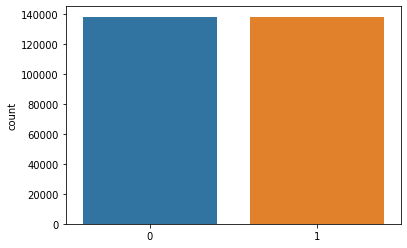

In [32]:
# Balanceamento dos dados:

# Técnica de under-sampling
rus = RandomUnderSampler()
X_train, y_train = rus.fit_sample(X_train, y_train)
 
# Visualizar o balanceamento das classes
print(pd.Series(y_train).value_counts())
 
# Plotar a nova distribuição de classes
sns.countplot(y_train);

Executando o modelo de árvore de decisão:

In [33]:
def treinar_modelo(altura):
    model = DecisionTreeClassifier(criterion='entropy',
                                   max_depth=altura, random_state=0)
    model.fit(X_train, y_train)
    return model

In [34]:
# Vamos executar o modelo várias vezes, incrementando a altura da árvore,
# começando de 1 indo até 20:
for altura in range(1, 20):
    model = treinar_modelo(altura)
    y_pred = model.predict(X_test)
  
    print('-------------------------------------------------------')
    print(f'Altura - {altura}')
    # Mostrar acurácia do modelo
    print("Acurácia: {:.4f}".format(accuracy_score(y_test, y_pred)))
    # Mostrar a área sob a curva
    print("AUC: {:.4f}".format(roc_auc_score(y_test, y_pred)))

-------------------------------------------------------
Altura - 1
Acurácia: 0.9476
AUC: 0.7841
-------------------------------------------------------
Altura - 2
Acurácia: 0.9645
AUC: 0.8558
-------------------------------------------------------
Altura - 3
Acurácia: 0.9760
AUC: 0.9186
-------------------------------------------------------
Altura - 4
Acurácia: 0.9845
AUC: 0.9516
-------------------------------------------------------
Altura - 5
Acurácia: 0.9782
AUC: 0.9632
-------------------------------------------------------
Altura - 6
Acurácia: 0.9880
AUC: 0.9631
-------------------------------------------------------
Altura - 7
Acurácia: 0.9810
AUC: 0.9770
-------------------------------------------------------
Altura - 8
Acurácia: 0.9883
AUC: 0.9784
-------------------------------------------------------
Altura - 9
Acurácia: 0.9887
AUC: 0.9794
-------------------------------------------------------
Altura - 10
Acurácia: 0.9863
AUC: 0.9814
---------------------------------------

A Acurácia variou de 0.9476 a 0.9907. E AUC variou de 0.7841 a 0.9873. Vamos ver com mais detalhes o melhor desempenho geral escolhido:

Acurácia: 0.9907

Relatório de classificação:
               precision    recall  f1-score   support

           0     0.9415    0.9820    0.9613     46017
           1     0.9976    0.9918    0.9947    343969

    accuracy                         0.9907    389986
   macro avg     0.9695    0.9869    0.9780    389986
weighted avg     0.9910    0.9907    0.9908    389986

AUC: 0.9869



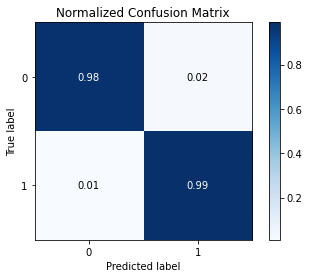

In [35]:
# Reexecutando modelo para a altura que teve o melhor desempenho:
model = treinar_modelo(15)
y_pred = model.predict(X_test)
  
# Mostrar acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# Plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# Mostrar relatório de classificação
print("Relatório de classificação:\n", classification_report(y_test, y_pred, digits=4))

# Mostrar a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.392993 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.392993 to fit



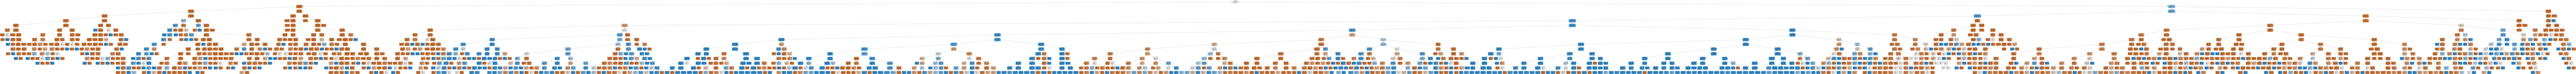

In [36]:
classes_names = ['%.f' % i for i in model.classes_]

dot_data = export_graphviz(model, filled=True, class_names=classes_names, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())
graph.write_png("tree.png")
Image('tree.png')